In [183]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [184]:
train_data=pd.read_csv('titanic.csv')
test_data=pd.read_csv('test.csv')
sub=pd.read_csv('test.csv')

In [185]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [187]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [188]:
train_data=train_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [189]:

test_data=test_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
test_data.head()

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [190]:
gender=pd.get_dummies(train_data['Sex'])
train_data=train_data.drop(['Sex'],axis=1)
train_data=pd.concat([train_data,gender],axis=1)
train_data

,Survived,Pclass,Age,female,male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1
5,0,3,NaN,0,1
6,0,1,54.0,0,1
7,0,3,2.0,0,1
8,1,3,27.0,1,0
9,1,2,14.0,1,0


In [191]:

train_data.head()

,Survived,Pclass,Age,female,male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [192]:
gender=pd.get_dummies(test_data['Sex'])
test_data=test_data.drop(['Sex'],axis=1)
test_data=pd.concat([test_data,gender],axis=1)
test_data.head()

,Pclass,Age,female,male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0


In [193]:
test_data

,Pclass,Age,female,male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0
5,3,14.0,0,1
6,3,30.0,1,0
7,2,26.0,0,1
8,3,18.0,1,0
9,3,21.0,0,1


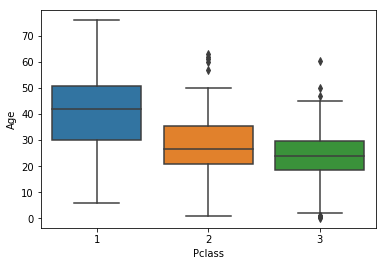

In [194]:

sns.boxplot(test_data['Pclass'],test_data['Age'])

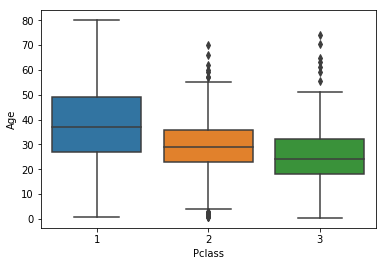

In [195]:
sns.boxplot(train_data['Pclass'],train_data['Age'])

In [196]:
def age(col):
    varage=col[0]
    varclass=col[1]
    if(pd.isnull(varage)):
        if varclass==1:
            return 45
        if varclass==2:
            return 25
        else:
            
            return 20
    else:
        return varage 

In [197]:
train_data['Age']=train_data[['Age','Pclass']].apply(age,axis=1)
train_data.isnull().sum()

Survived    0
Pclass      0
Age         0
female      0
male        0
dtype: int64

In [198]:
test_data['Age']=test_data[['Age','Pclass']].apply(age,axis=1)
test_data.isnull().sum()

Pclass    0
Age       0
female    0
male      0
dtype: int64

In [199]:
x=train_data.iloc[:,1:]
y=train_data.iloc[:,0]
train = train_data.drop('Survived', axis=1)
target = train_data['Survived']

In [200]:
train.isnull().sum()

Pclass    0
Age       0
female    0
male      0
dtype: int64

In [201]:
Log_reg=LogisticRegression()

In [202]:
Log_reg.fit(train,target)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [203]:
y_pred=Log_reg.predict(test_data)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [204]:
submission = pd.DataFrame({
        "PassengerId": sub["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)

In [205]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [206]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,random_state=40)

In [207]:
X_train

,Pclass,Age,female,male
672,2,70.0,0,1
236,2,44.0,0,1
269,1,35.0,1,0
463,2,48.0,0,1
454,3,20.0,0,1
133,2,29.0,1,0
683,3,14.0,0,1
281,3,28.0,0,1
139,1,24.0,0,1
253,3,30.0,0,1


In [208]:
Log_reg.fit(X_train,Y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [209]:
y_predict=Log_reg.predict(X_test)

In [211]:
accuracy_score(Y_test,y_predict)

0.8283582089552238

In [212]:
value_of_score=list()
for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,random_state=i)
    Log_reg.fit(X_train,Y_train)
    y_predict=Log_reg.predict(X_test)
    score=accuracy_score(Y_test,y_predict)
    value_of_score.append(score)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [213]:
max(value_of_score)

0.8656716417910447

In [214]:
value_of_score.index(max(value_of_score))

10

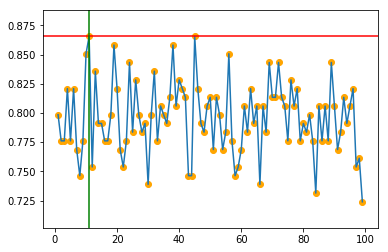

In [215]:
plt.scatter(range(1,100),value_of_score,color='orange')
plt.plot(range(1,100),value_of_score)
plt.axhline(max(value_of_score),color='red')
plt.axvline(11,color='green')

In [217]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,random_state=11)
Log_reg.fit(X_train,Y_train)
y_predict=Log_reg.predict(X_test)
score=accuracy_score(Y_test,y_predict)
score

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8656716417910447